In [4]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('abortion.csv')
df.head(n=10)
df.columns


In [ ]:
cost

In [ ]:
df.columns

In [129]:
df_new =  df[['U.S. State', '% of births that were publicly funded, 2010',
              '% of counties without a known abortion provider, 2014', 
              '% of counties without a known clinic, 2020 [4]',
             '% of likely need met by Title X-funded centers, 2016',
             '% of likely need met by publicly funded centers, 2016',
             'No. of abortion clinics, 2020 [4]', 'No. of births averted by publicly funded centers, 2016',
             'Annual abortion costs saved from contraceptive services at publicly funded family planning centers (in 000s of dollars), 2010',
             'Annual abortion costs saved from contraceptive services at Title X funded centers (in 000s of dollars), 2010'
             ]]

#need to update df_new

df_new = df_new.rename(columns={
    'U.S. State': 'State',
    '% of births that were publicly funded, 2010': 'Publicly Funded Births (%)',
    '% of counties without a known abortion provider, 2014': '(%) Counties without Abortion Provider',
    '% of counties without a known clinic, 2020 [4]': '(%) Counties without Clinic',
    '% of likely need met by Title X-funded centers, 2016': 'Title X Center Need Met',
    '% of likely need met by publicly funded centers, 2016': 'Publicly Funded Centers Need Met',
    'No. of abortion clinics, 2020 [4]': 'No of Abortion Clinics',
    'No. of births averted by publicly funded centers, 2016': 'Births Averted by Publicly Funded Centers',
    'Annual abortion costs saved from contraceptive services at publicly funded family planning centers (in 000s of dollars), 2010': 
    'Abortion Costs Saved at Publicly Funded Family Planning Centers',
    'Annual abortion costs saved from contraceptive services at Title X funded centers (in 000s of dollars), 2010':
    'Abortion Costs Saved at Title X Funded Centers',
})

df_new.head(n=10)
df_new.columns

Index(['State', 'Publicly Funded Births (%)',
       '(%) Counties without Abortion Provider', '(%) Counties without Clinic',
       'Title X Center Need Met', 'Publicly Funded Centers Need Met',
       'No of Abortion Clinics', 'Births Averted by Publicly Funded Centers',
       'Abortion Costs Saved at Publicly Funded Family Planning Centers',
       'Abortion Costs Saved at Title X Funded Centers'],
      dtype='object')

In [130]:

access = df_new[['State', '(%) Counties without Abortion Provider', '(%) Counties without Clinic', 'No of Abortion Clinics']]


In [131]:
county_counts = {'California': 58, 'Georgia': 159, 'Illinois': 102, 'Washington': 39,  'Colorado': 64, 'Kansas': 105, 
                 'New York': 62, 'Texas': 254, 'Pennsylvania': 67, 'Massachusetts': 14}

# Map county counts to states
access['County Count Per State'] = df_new['State'].map(county_counts)

/var/folders/jy/c8rrvktd49g7xb48wfjh3ych0000gn/T/ipykernel_79108/649165329.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
access.head(n=10)

,State,(%) Counties without Abortion Provider,(%) Counties without Clinic,No of Abortion Clinics,County Count Per State
0,California,24,38,173,58.0
1,Georgia,94,95,14,159.0
2,Illinois,91,89,30,102.0
3,Washington,94,56,37,39.0
4,Colorado,77,77,23,64.0
5,Kansas,97,98,4,105.0
6,New York,37,37,104,62.0
7,Texas,95,96,24,254.0
8,Pennsylvania,81,82,17,67.0
9,Massachusetts,21,50,17,14.0


In [60]:
access.dtypes

State                                      object
(%) Counties without Abortion Provider     object
(%) Counties without Clinic               float64
No of Abortion Clinics                     object
County Count Per State                    float64
dtype: object

In [ ]:
# To convert multiple columns to int
access['(%) Counties without Abortion Provider' ] = access['(%) Counties without Abortion Provider'].str.replace(r'[^\d.]+', '', regex=True)

access['(%) Counties without Abortion Provider']  = pd.to_numeric(access['(%) Counties without Abortion Provider'] , errors='coerce')

In [ ]:
access = access.drop([10, 11, 12])

In [72]:
access = access.drop([10])

In [73]:
access.head(n=12)

,State,(%) Counties without Abortion Provider,(%) Counties without Clinic,No of Abortion Clinics,County Count Per State
0,California,24.0,38.0,173.0,58.0
1,Georgia,94.0,95.0,14.0,159.0
2,Illinois,91.0,89.0,30.0,102.0
3,Washington,94.0,56.0,37.0,39.0
4,Colorado,77.0,77.0,23.0,64.0
5,Kansas,97.0,98.0,4.0,105.0
6,New York,37.0,37.0,104.0,62.0
7,Texas,95.0,96.0,24.0,254.0
8,Pennsylvania,81.0,82.0,17.0,67.0
9,Massachusetts,21.0,50.0,17.0,14.0


In [80]:
# baseline % of county without clinic to determine high/low access

baseline = access['(%) Counties without Clinic'].mean()
stdev = access['(%) Counties without Clinic'].std()

print(baseline) #On average, the majority (71%) of counties in a state do not have a clinic.
print(stdev) #On average, this differs by 24 %

#Considering the mean is 71.8, avg access is 47-71, low access is 71-95, high access = <0-47
#Shade background red based on low, yellow based on avg, and green based on high?

71.8
24.302720469573405


In [273]:
print(access)

           State  (%) Counties without Abortion Provider  \
0     California                                      24   
1        Georgia                                      94   
2       Illinois                                      91   
3     Washington                                      94   
4       Colorado                                      77   
5         Kansas                                      97   
6       New York                                      37   
7          Texas                                      95   
8   Pennsylvania                                      81   
9  Massachusetts                                      21   

   (%) Counties without Clinic  No of Abortion Clinics  County Count Per State  
0                           38                     173                    58.0  
1                           95                      14                   159.0  
2                           89                      30                   102.0  
3              

In [291]:
# Check if a score is within the high access range

input_state = 'Kansas'

def get_score_by_state(input_state):
    # Check if the input_state is in the DataFrame
    if input_state in access['State'].values:
        
        # Get the row from the DataFrame for the matching state
        state_row = access[access['State'] == input_state]
        # Extract the accessibility score for this state
        return state_row['(%) Counties without Clinic'].iloc[0]
    else:
        return None


# Get the score for the input state
score = get_score_by_state(input_state)

def categorize_access(score):
    avg_access_range = (48, 72)
    low_access_range = (72, max(access['(%) Counties without Clinic']))
    high_access_range = (0, 47)
    
    if high_access_range[0] <= score <= high_access_range[1]:
        return 'High', 'green'
    elif avg_access_range[0] <= score <= avg_access_range[1]:
        return 'Average', 'yellow'
    elif low_access_range[0] <= score <= low_access_range[1]:
        return 'Low', 'red'
    else:
        return 'Undefined', 'grey'

access_level = categorize_access(score)
print(f"The access level is {access_level} for a score of {score}.")

The access level is ('Low', 'red') for a score of 98.


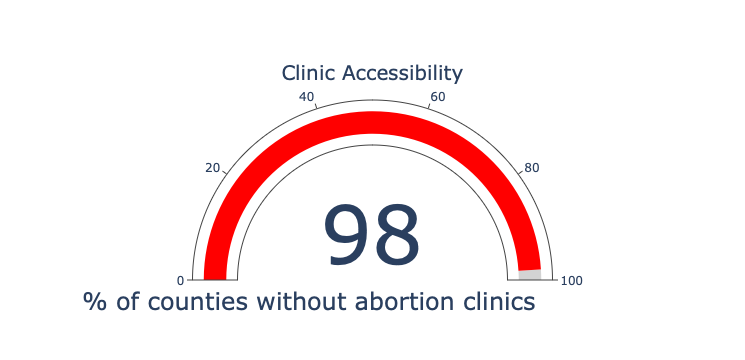

In [292]:
import plotly.graph_objs as go

# Function to draw the gauge chart
def draw_gauge_chart(score, title="Clinic Accessibility"):
    # Get the access level and color based on the percentage
    access_level, color = categorize_access(score)
    
    # Draw the gauge chart using Plotly
    fig = go.Figure()

    fig.add_trace(go.Indicator(
        mode = "gauge+number",
        value = score,
        title = {'text': title},
        gauge = {
            'axis': {'range': [None, 100]},
            'bar': {'color': color}, # the bar color
            'steps' : [
                {'range': [score, 100], 'color': 'lightgray', 
                    'thickness': 0.5},
            ],
        }
    ))
    
    # note to make it dependent on input
    
    caption = go.layout.Annotation(
    text=f"% of counties without abortion clinics",
    showarrow=False,
    xref="paper",
    yref="paper",
    x=0,
    y=-0.2,
    font=dict(size=24),
    align='center',
   )

    fig.update_layout(annotations=[caption])
    fig.show()

# Example usage:
input_state = 'Kansas'  # Replace with the actual state name
score = get_score_by_state(input_state)
if score is not None:
    draw_gauge_chart(score)
else:
    print(f"No data available for {input_state}.")


In [ ]:
#Function for generating visual based on input

## (Cost) Data Cleaning ## 

In [153]:
df.columns


df = df.rename(columns={
    'U.S. State': 'State',
    '% of births that were publicly funded, 2010': 'Publicly Funded Births (%)',
    '% of counties without a known abortion provider, 2014': '(%) Counties without Abortion Provider',
    '% of counties without a known clinic, 2020 [4]': '(%) Counties without Clinic',
    '% of likely need met by Title X-funded centers, 2016': 'Title X Center Need Met',
    '% of likely need met by publicly funded centers, 2016': 'Publicly Funded Centers Need Met',
    'No. of abortion clinics, 2020 [4]': 'No of Abortion Clinics',
    'No. of births averted by publicly funded centers, 2016': 'Births Averted by Publicly Funded Centers',
    'Annual abortion costs saved from contraceptive services at publicly funded family planning centers (in 000s of dollars), 2010': 
    'Abortion Costs Saved at Publicly Funded Family Planning Centers',
    'Annual abortion costs saved from contraceptive services at Title X funded centers (in 000s of dollars), 2010':
    'Abortion Costs Saved at Title X Funded Centers',
    'No. of publicly funded family planning centers, 2015': 'No. of publicly funded centers',
    'No. of Title X-funded centers, 2015': 'No. of Title-X centers',
    'No. of abortion providers, 2017 [4]': 'No. of abortion providers',
})

In [154]:
cost_data =  df[['State', 'Publicly Funded Births (%)', 'Title X Center Need Met', 'Publicly Funded Centers Need Met',
            'Births Averted by Publicly Funded Centers', 'Abortion Costs Saved at Publicly Funded Family Planning Centers',
            'Abortion Costs Saved at Title X Funded Centers',
                'No. of publicly funded centers',
                'No. of Title-X centers', 'No. of abortion providers']]

In [155]:
#Analyzing cost data

cost_data  = cost_data.drop([10,11,12])

#print(cost)

#abortion 
cost_data.head(n=10)

,State,Publicly Funded Births (%),Title X Center Need Met,Publicly Funded Centers Need Met,Births Averted by Publicly Funded Centers,Abortion Costs Saved at Publicly Funded Family Planning Centers,Abortion Costs Saved at Title X Funded Centers,No. of publicly funded centers,No. of Title-X centers,No. of abortion providers
0,California,49.7,36,64,"163,380","17,463","12,566","1,697",353,419.0
1,Georgia,61.6,12,26,"19,680",5,3,383,125,26.0
2,Illinois,55.5,13,24,"19,210",74,41,340,95,40.0
3,Washington,45.2,20,66,"13,670","3,471","2,314",257,64,51.0
4,Colorado,44.2,12,35,"11,660",0,0,221,64,32.0
5,Kansas,32.5 [2],13,18,"3,470",0,0,128,63,4.0
6,New York,52.2,23,37,"43,820","4,279","3,129",557,175,252.0
7,Texas,60.9,8,21,"41,890",1,1,453,96,35.0
8,Pennsylvania,38.5,24,32,"23,580",1,1,309,169,43.0
9,Massachusetts,35.3,16,25,"9,170",488,298,229,90,47.0


In [156]:
cost_data.dtypes

State                                                               object
Publicly Funded Births (%)                                          object
Title X Center Need Met                                             object
Publicly Funded Centers Need Met                                    object
Births Averted by Publicly Funded Centers                           object
Abortion Costs Saved at Publicly Funded Family Planning Centers     object
Abortion Costs Saved at Title X Funded Centers                      object
No. of publicly funded centers                                      object
No. of Title-X centers                                              object
No. of abortion providers                                          float64
dtype: object

In [165]:
cost_data.columns[1:10]

Index(['Publicly Funded Births (%)', 'Title X Center Need Met',
       'Publicly Funded Centers Need Met',
       'Births Averted by Publicly Funded Centers',
       'Abortion Costs Saved at Publicly Funded Family Planning Centers',
       'Abortion Costs Saved at Title X Funded Centers',
       'No. of publicly funded centers', 'No. of Title-X centers',
       'No. of abortion providers'],
      dtype='object')

In [167]:
cost_data.dtypes

State                                                               object
Publicly Funded Births (%)                                         float64
Title X Center Need Met                                              int64
Publicly Funded Centers Need Met                                     int64
Births Averted by Publicly Funded Centers                            int64
Abortion Costs Saved at Publicly Funded Family Planning Centers      int64
Abortion Costs Saved at Title X Funded Centers                       int64
No. of publicly funded centers                                       int64
No. of Title-X centers                                               int64
No. of abortion providers                                          float64
dtype: object

In [169]:
cost_data.head(n=10)

,State,Publicly Funded Births (%),Title X Center Need Met,Publicly Funded Centers Need Met,Births Averted by Publicly Funded Centers,Abortion Costs Saved at Publicly Funded Family Planning Centers,Abortion Costs Saved at Title X Funded Centers,No. of publicly funded centers,No. of Title-X centers,No. of abortion providers
0,California,49.70,36,64,163380,17463,12566,1697,353,419.0
1,Georgia,61.60,12,26,19680,5,3,383,125,26.0
2,Illinois,55.50,13,24,19210,74,41,340,95,40.0
3,Washington,45.20,20,66,13670,3471,2314,257,64,51.0
4,Colorado,44.20,12,35,11660,0,0,221,64,32.0
5,Kansas,32.52,13,18,3470,0,0,128,63,4.0
6,New York,52.20,23,37,43820,4279,3129,557,175,252.0
7,Texas,60.90,8,21,41890,1,1,453,96,35.0
8,Pennsylvania,38.50,24,32,23580,1,1,309,169,43.0
9,Massachusetts,35.30,16,25,9170,488,298,229,90,47.0


In [179]:
cost_data.head()

,State,Publicly Funded Births (%),Title X Center Need Met,Publicly Funded Centers Need Met,Births Averted by Publicly Funded Centers,Abortion Costs Saved at Publicly Funded Family Planning Centers,Abortion Costs Saved at Title X Funded Centers,No. of publicly funded centers,No. of Title-X centers,No. of abortion providers
0,California,49.7,36,64,163380,17463,12566,1697,353,419.0
1,Georgia,61.6,12,26,19680,5,3,383,125,26.0
2,Illinois,55.5,13,24,19210,74,41,340,95,40.0
3,Washington,45.2,20,66,13670,3471,2314,257,64,51.0
4,Colorado,44.2,12,35,11660,0,0,221,64,32.0


In [183]:
# baseline abortion provider (across all states - not the best but just get something working)

#baseline = cost_data['No. of abortion providers'].mean()
baseline = cost_data['No. of abortion providers'].median()

print(baseline)


#Because California skewed the mean, I am using median.

#On average, tech hub cities have around 40 abortion providers. 

41.5


In [189]:
# For the sake of standard deviation calculation:

copy = cost_data.copy()
data = copy['No. of abortion providers']



outliers = [419, 252]
copy = [x for x in data if x not in outliers]

# Calculate the absolute deviations from the median
absolute_deviations = [abs(x - baseline) for x in copy]
variance = np.mean(np.square(absolute_deviations))
std_based_on_median = np.sqrt(variance)
print("Standard deviation based on the median after removing outliers:", std_based_on_median)

#On average, tech hubs differ by 15 in terms of abortion providers
#High access to providers: 56+
#Low access to providers: 0-26
#Avg access to providers: 41-56



Standard deviation based on the median after removing outliers: 15.427248620541512


In [191]:
cost_data.columns

Index(['State', 'Publicly Funded Births (%)', 'Title X Center Need Met',
       'Publicly Funded Centers Need Met',
       'Births Averted by Publicly Funded Centers',
       'Abortion Costs Saved at Publicly Funded Family Planning Centers',
       'Abortion Costs Saved at Title X Funded Centers',
       'No. of publicly funded centers', 'No. of Title-X centers',
       'No. of abortion providers'],
      dtype='object')

## Cost Visualization ##

In [192]:
input_state = 'Kansas'

def provider_by_state(input_state):
    # Check if the input_state is in the DataFrame
    if input_state in cost_data['State'].values:
        
        # Get the row from the DataFrame for the matching state
        state_row = cost_data[cost_data['State'] == input_state]
        # Extract the accessibility score for this state
        return state_row['No. of abortion providers'].iloc[0]
    else:
        return None

# Get the provider count for the input state
count = provider_by_state(input_state)

#High access to providers: 56+
#Low access to providers: 0-26
#Avg access to providers: 41-56

def categorize_access(count):
    avg_access = (41, 56)
    low_access = (0, 26)
    high_access = (56, max(cost_data['No. of abortion providers']))
    
    if high_access[0] <= count <= high_access_[1]:
        return 'High'
    elif avg_access[0] <= count <= avg_access[1]:
        return 'Average'
    elif low_access[0] <= count <= low_access[1]:
        return 'Low'
    else:
        return 'Undefined'

access_level = categorize_access(count)
print(f"This state has a {access_level} number of providers: {count}")
    
    print(high_access)

In [203]:
cost_data.columns

Index(['State', 'Publicly Funded Births (%)', 'Title X Center Need Met',
       'Publicly Funded Centers Need Met',
       'Births Averted by Publicly Funded Centers',
       'Abortion Costs Saved at Publicly Funded Family Planning Centers',
       'Abortion Costs Saved at Title X Funded Centers',
       'No. of publicly funded centers', 'No. of Title-X centers',
       'No. of abortion providers'],
      dtype='object')

In [205]:
title_x = cost_data[['State', 'Abortion Costs Saved at Title X Funded Centers']]
public = cost_data[['State', 'Abortion Costs Saved at Publicly Funded Family Planning Centers']]


This state has a Avg number of providers: 47.0


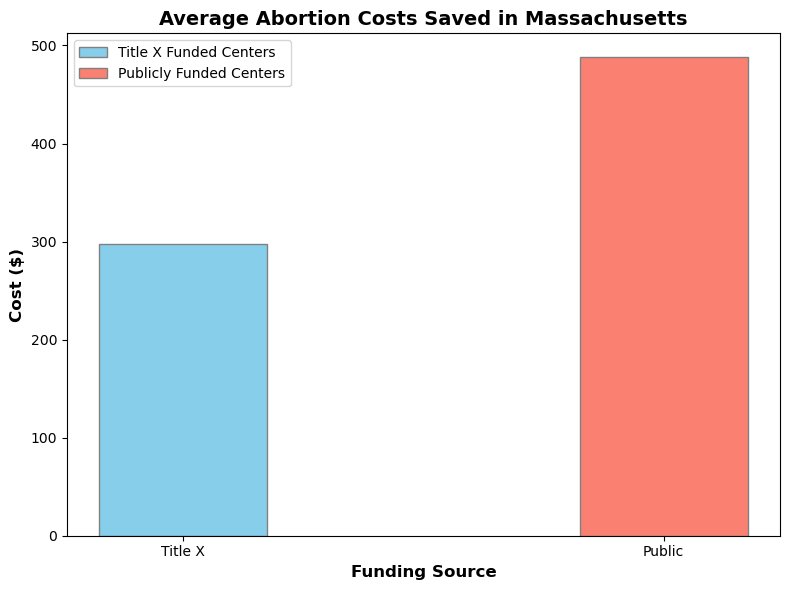

In [289]:
import matplotlib.pyplot as plt
import numpy as np

def provider_by_state(input_state):
    # Assuming cost_data is your DataFrame containing the state-wise data
    if input_state in cost_data['State'].values:
        state_row = cost_data[cost_data['State'] == input_state]
        return state_row['No. of abortion providers'].iloc[0]
    else:
        return None

def categorize_access(count):
    avg_access = (41, 56)
    low_access = (0, 40)
    high_access = (56, max(cost_data['No. of abortion providers']))
    
    if high_access[0] <= count <= high_access[1]:
        return 'High'
    elif avg_access[0] <= count <= avg_access[1]:
        return 'Avg'
    elif low_access[0] <= count <= low_access[1]:
        return 'Low'
    else:
        return 'Undefined'
    
def generate_chart(input_state):
    count = provider_by_state(input_state)
    if count is not None:
        access_level = categorize_access(count)
        print(f"This state has a {access_level} number of providers: {count}")
        
        # Filter the data for the given state
        state_data = cost_data[cost_data['State'] == input_state]
        title_x = state_data['Abortion Costs Saved at Title X Funded Centers'].iloc[0]
        public = state_data['Abortion Costs Saved at Publicly Funded Family Planning Centers'].iloc[0]
        
        # Check if costs saved in either Title X or public are less than $5
        if title_x < 5 and public < 5:
            print(f"Due to limited abortion options, the abortion costs via Title X are {title_x}.")
            print(f"Due to limited abortion options, the abortion costs via public centers are {public}.")
            
            
        elif title_x < 5 or public < 5:
            print(f"Due to limited abortion options, the abortion costs ($) via Title X are {title_x}")
            print(f"Due to limited abortion options, the abortion costs ($) via public centers are {public}")
            
        else:
            if access_level == "Low":
                plt.figure(figsize=(8, 6))
                bar_width = 0.35
                plt.bar(0, title_x, color='skyblue', width=bar_width, edgecolor='grey', label='Title X Funded Centers')
                plt.bar(1, public, color='salmon', width=bar_width, edgecolor='grey', label='Publicly Funded Centers')

            # Add title and axis labels
                plt.xlabel('Funding Source', fontsize=12, fontweight='bold')
                plt.ylabel('Cost ($)', fontsize=12, fontweight='bold')
                plt.title(f"Average Abortion Costs Saved in {input_state}", fontsize=14, fontweight='bold')

    # Customize ticks and legend
                plt.xticks([0, 1], ['Title X', 'Public'], fontsize=10)
                plt.yticks(fontsize=10)
                plt.legend(fontsize=10)

    # Display the chart
                plt.tight_layout()
                plt.show()
            elif access_level == "Avg":
                plt.figure(figsize=(8, 6))
                bar_width = 0.35
                plt.bar(0, title_x, color='skyblue', width=bar_width, edgecolor='grey', label='Title X Funded Centers')
                plt.bar(1, public, color='salmon', width=bar_width, edgecolor='grey', label='Publicly Funded Centers')

    # Add title and axis labels
                plt.xlabel('Funding Source', fontsize=12, fontweight='bold')
                plt.ylabel('Cost ($)', fontsize=12, fontweight='bold')
                plt.title(f"Average Abortion Costs Saved in {input_state}", fontsize=14, fontweight='bold')

    # Customize ticks and legend
                plt.xticks([0, 1], ['Title X', 'Public'], fontsize=10)
                plt.yticks(fontsize=10)
                plt.legend(fontsize=10)

    # Display the chart
                plt.tight_layout()
                plt.show()
            else:
                plt.figure(figsize=(8, 6))
                bar_width = 0.35
                plt.bar(0, title_x, color='skyblue', width=bar_width, edgecolor='grey', label='Title X Funded Centers')
                plt.bar(1, public, color='salmon', width=bar_width, edgecolor='grey', label='Publicly Funded Centers')

    # Add title and axis labels
                plt.xlabel('Funding Source', fontsize=12, fontweight='bold')
                plt.ylabel('Cost ($)', fontsize=12, fontweight='bold')
                plt.title(f"Average Abortion Costs Saved in {input_state}", fontsize=14, fontweight='bold')

    # Customize ticks and legend
                plt.xticks([0, 1], ['Title X', 'Public'], fontsize=10)
                plt.yticks(fontsize=10)
                plt.legend(fontsize=10)

    # Display the chart
                plt.tight_layout()
                plt.show()
                


# Example usage:
input_state = 'Massachusetts'  # Replace with the actual state name
generate_chart(input_state)

#title x = 12,566
#public = 17, 463

In [246]:
cost_data.head(n=10)

,State,Publicly Funded Births (%),Title X Center Need Met,Publicly Funded Centers Need Met,Births Averted by Publicly Funded Centers,Abortion Costs Saved at Publicly Funded Family Planning Centers,Abortion Costs Saved at Title X Funded Centers,No. of publicly funded centers,No. of Title-X centers,No. of abortion providers
0,California,49.70,36,64,163380,17463,12566,1697,353,419.0
1,Georgia,61.60,12,26,19680,5,3,383,125,26.0
2,Illinois,55.50,13,24,19210,74,41,340,95,40.0
3,Washington,45.20,20,66,13670,3471,2314,257,64,51.0
4,Colorado,44.20,12,35,11660,0,0,221,64,32.0
5,Kansas,32.52,13,18,3470,0,0,128,63,4.0
6,New York,52.20,23,37,43820,4279,3129,557,175,252.0
7,Texas,60.90,8,21,41890,1,1,453,96,35.0
8,Pennsylvania,38.50,24,32,23580,1,1,309,169,43.0
9,Massachusetts,35.30,16,25,9170,488,298,229,90,47.0


In [267]:

cost = pd.DataFrame(cost_data)
access_data = pd.DataFrame(access)
access_data = access_data.drop([10,11,12])
print(access_data)


           State (%) Counties without Abortion Provider  \
0     California                                     24   
1        Georgia                                     94   
2       Illinois                                     91   
3     Washington                                     94   
4       Colorado                                     77   
5         Kansas                                     97   
6       New York                                     37   
7          Texas                                     95   
8   Pennsylvania                                     81   
9  Massachusetts                                     21   

  (%) Counties without Clinic No of Abortion Clinics  County Count Per State  
0                          38                    173                    58.0  
1                          95                     14                   159.0  
2                          89                     30                   102.0  
3                          56     

In [259]:

# Export DataFrame to CSV file
cost.to_csv('cost.csv', index=False)  # Set index=False to exclude index from the CSV file



In [268]:
# Export DataFrame to CSV file
access_data.to_csv('access.csv', index=False)  # Set index=False to exclude index from the CSV file


In [269]:
access = pd.read_csv('access.csv')
access.dtypes

State                                      object
(%) Counties without Abortion Provider      int64
(%) Counties without Clinic                 int64
No of Abortion Clinics                      int64
County Count Per State                    float64
dtype: object